In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Volumetric_features.csv')

In [3]:
x = df.drop('Age', axis=1)
y = df['Age']

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [5]:
lasso = Lasso(alpha=0.1)

In [6]:
lasso.fit(x_train, y_train)


C:\Users\sanja\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.154e+05, tolerance: 1.353e+02
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [7]:
y_pred = lasso.predict(x_test)

In [8]:
accuracy = r2_score(y_test, y_pred) * 100
print("Accuracy of the model is: %.2f" % accuracy)

Accuracy of the model is: 83.80


Text(0, 0.5, 'Predicted')

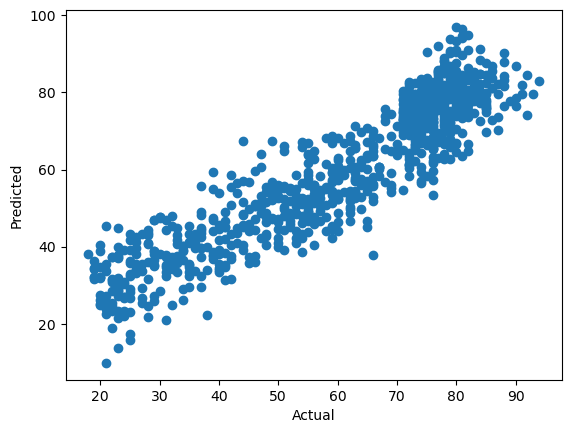

In [9]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')


<AxesSubplot:xlabel='Age'>

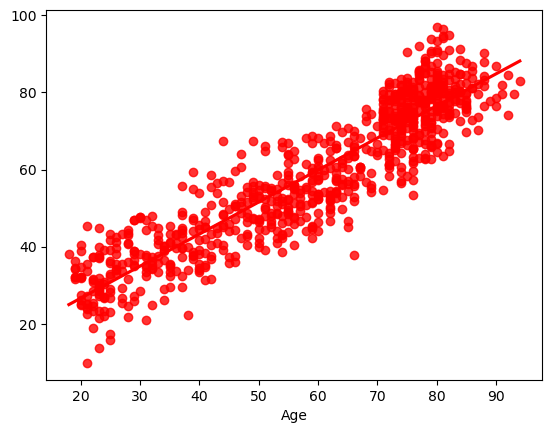

In [11]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')

In [12]:
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': y_test - y_pred})
pred_df

,Actual Value,Predicted Value,Difference
1612,80,79.738123,0.261877
2726,58,55.542188,2.457812
2242,86,81.213124,4.786876
4130,78,88.070037,-10.070037
3973,68,65.376674,2.623326
...,...,...,...
907,71,80.271224,-9.271224
80,85,84.437734,0.562266
257,76,82.761571,-6.761571
295,82,77.647396,4.352604
